In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load dataset
data_path = r'C:\Users\Admin\Desktop\HK1_2024\AI\final\dt_data.csv'
data = pd.read_csv(data_path)

# Encode 'Rank' column
encoder = LabelEncoder()
data['Rank_encoded'] = encoder.fit_transform(data[''])

# Function to calculate entropy
def entropy(column):
    values, counts = np.unique(column, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Function to calculate average entropy and information gain
def average_entropy_and_ig(data, attribute, target):
    values, counts = np.unique(data[attribute], return_counts=True)
    weighted_entropy = 0
    
    for value, count in zip(values, counts):
        subset = data[data[attribute] == value][target]
        weighted_entropy += (count / len(data)) * entropy(subset)
    
    total_entropy = entropy(data[target])
    information_gain = total_entropy - weighted_entropy
    
    return weighted_entropy, information_gain
attribute = input("Enter the score attribute (Q1 to Q9): ")
# Main function to compute the metrics
def compute_metrics(data, attribute):
    H = entropy(data['attribute'])
    AE, IG = average_entropy_and_ig(data, attribute, 'Rank_encoded')
    return H, AE, IG


H, AE, IG = compute_metrics(data, attribute)
print(f"Entropy (H): {H}")
print(f"Average Entropy (AE): {AE}")
print(f"Information Gain (IG): {IG}")


Enter the score attribute (Q1 to Q9): Q1


KeyError: 'attribute'

Accuracy: 0.6481481481481481


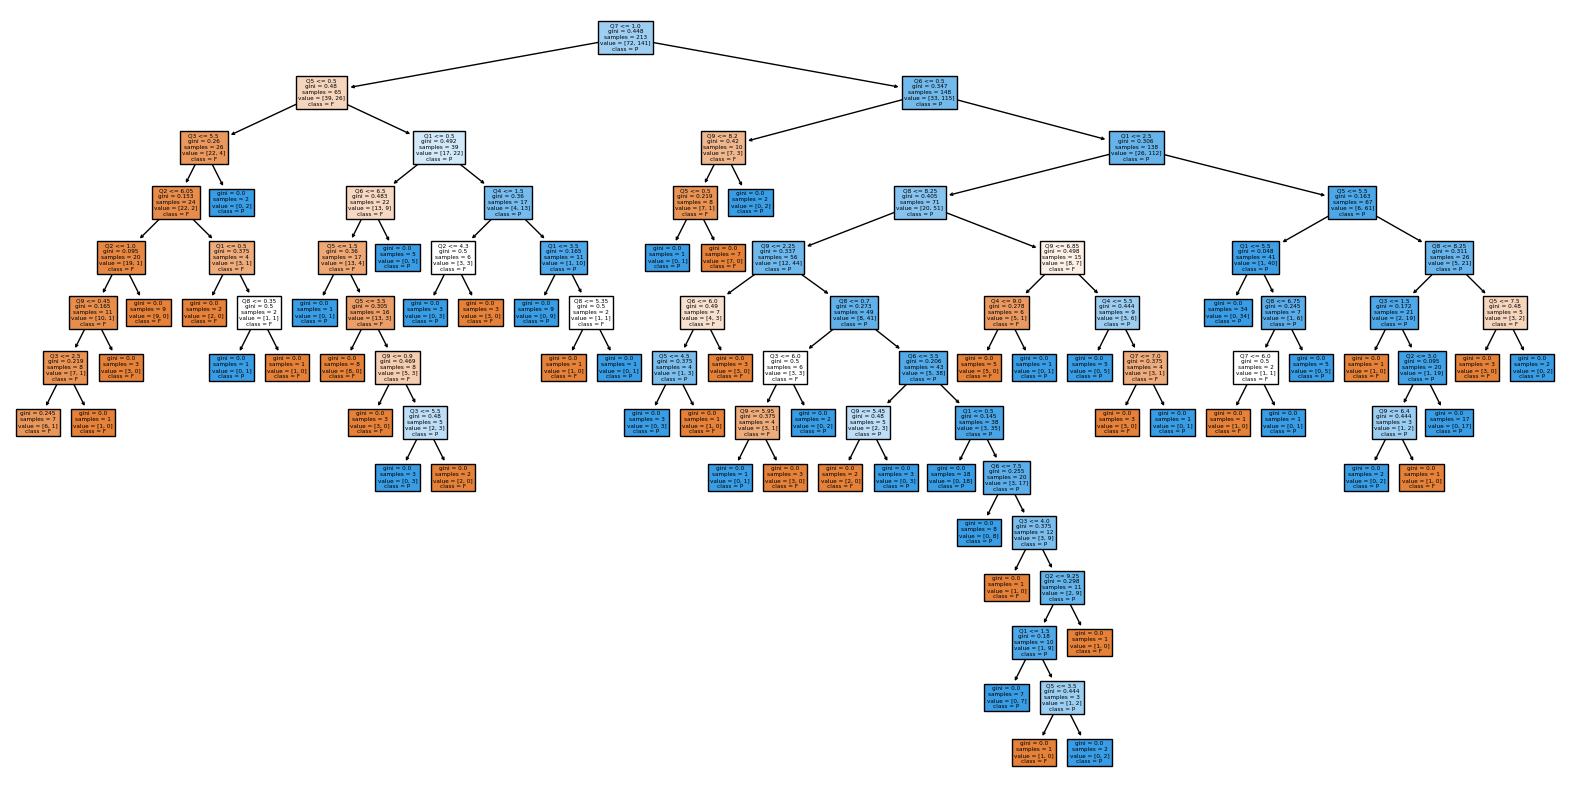

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define features and target
X = data.drop(columns=['Rank', 'Rank_encoded', '#', 'Unnamed: 11'])  # Drop non-feature columns and any unnamed columns
y = data['Rank_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns.tolist(), class_names=encoder.classes_.tolist())
plt.show()


In [38]:
import pandas as pd

# Load the dataset
file_path =  r'C:\Users\Admin\Desktop\HK1_2024\AI\final\dt_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,#,Rank,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Unnamed: 11
0,1,F,0,0.0,0,0,2,6,0,6.4,6.4,NaN
1,2,F,0,4.0,0,0,2,5,0,6.4,2.7,NaN
2,3,P,3,8.0,5,4,3,9,4,8.6,6.4,NaN
3,4,P,0,10.0,0,1,0,7,4,7.9,9.1,NaN
4,5,F,0,6.0,7,0,3,0,2,5.7,5.5,NaN


In [39]:
# clean data
df = df.drop(columns=['Unnamed: 11'])
duplicates = df[df.duplicated()]
if not duplicates.empty:
    print("Duplicates found:")
    print(duplicates)
else:
    print("No duplicates found.")

No duplicates found.


In [40]:
df

,#,Rank,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
0,1,F,0,0.0,0,0,2,6,0,6.4,6.4
1,2,F,0,4.0,0,0,2,5,0,6.4,2.7
2,3,P,3,8.0,5,4,3,9,4,8.6,6.4
3,4,P,0,10.0,0,1,0,7,4,7.9,9.1
4,5,F,0,6.0,7,0,3,0,2,5.7,5.5
...,...,...,...,...,...,...,...,...,...,...,...
262,263,F,0,4.1,7,1,5,6,0,0.0,9.1
263,264,P,3,6.0,7,2,2,0,0,5.0,0.0
264,265,P,4,8.0,0,2,5,9,4,9.3,7.3
265,266,P,1,0.0,1,0,1,10,0,0.0,0.0


Enter the name of the score attribute (Q1-Q9): Q1
Entropy (H) of Q1: 2.5248962387450886
Average Entropy (AE) of Q1: 0.8643297071195146
Information Gain (IG) of Q1: 0.05766599597492594
